<a href="https://colab.research.google.com/github/Raymay3/MAT422/blob/main/HW%203.7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 3.7.1. Mathematical formulation**

1. ***Setup and Overview***

Introduce neural networks and provide an overview of the architecture, focusing on:
- Layers and nodes
- Weights, biases, and activation functions

2. ***Single-Layer Neural Network Formulation***

**Explanation:** Start by defining a simple single-layer neural network, following the formula:

\begin{aligned}
\hat{y} = \sigma(w_1 a_1 + w_2 a_2 + b)
\end{aligned}

where $\sigma$ is an activation function like sigmoid or ReLU.

In [1]:
import numpy as np

# Input values
x1, x2 = 0.5, -1.5  # Example inputs

# Weights and bias
w1, w2 = 0.8, -0.6  # Example weights
b = 0.1             # Example bias

# Define the activation function (e.g., Sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the weighted sum and activation output
z = w1 * x1 + w2 * x2 + b
y_hat = sigmoid(z)

print("Output (ŷ) =", y_hat)

Output (ŷ) = 0.8021838885585817


3. ***Multi-Layer Neural Network (Forward Propagation)***

**Explanation:** For a more complex network, implement forward propagation by calculating the activations layer by layer. Use matrix representation for layers, weights, and biases.

Formula for forward propagation:

\begin{aligned}
a^{(l)} = \sigma(W^{(l)} \cdot a^{(l-1)} + b^{(l)})
\end{aligned}

In [2]:
# Initialize weights, biases, and input for a simple 2-layer neural network
W1 = np.array([[0.2, -0.3], [0.4, 0.1]])
b1 = np.array([0.1, -0.2])
W2 = np.array([[0.5], [-0.5]])
b2 = np.array([0.3])

# Input layer (layer 0)
a0 = np.array([x1, x2])

# Layer 1 computation
z1 = W1.dot(a0) + b1
a1 = sigmoid(z1)

# Layer 2 (Output layer) computation
z2 = W2.T.dot(a1) + b2
y_hat = sigmoid(z2)

print("Final Output (ŷ) =", y_hat)

Final Output (ŷ) = [0.59801959]


4. ***Generalizing to Multi-Layer Networks***

Use a loop for generalized forward propagation in neural networks with multiple layers. Here, use matrices $W$ and $b$ for weight and bias matrices across different layers.

In [4]:
# Define network parameters for each layer in dictionary form
parameters = {
    'W1': np.array([[0.2, -0.3], [0.4, 0.1]]),
    'b1': np.array([0.1, -0.2]),
    'W2': np.array([[0.5, -0.5]]),
    'b2': np.array([0.3])
}

# Forward propagation function
def forward_propagation(X, parameters):
    # Reshape X to a column vector
    A = X.reshape(-1, 1)
    activations = [A]
    L = len(parameters) // 2  # Number of layers

    for l in range(1, L + 1):
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)].reshape(-1, 1)  # Reshape bias as a column vector
        Z = np.dot(W, A) + b
        A = sigmoid(Z)
        activations.append(A)

    return activations[-1]

# Test with input
X = np.array([x1, x2])  # Make sure x1 and x2 are defined
y_hat = forward_propagation(X, parameters)
print("Network Output (ŷ):", y_hat)

Network Output (ŷ): [[0.59801959]]


5. ***Summary and Explanation of Mathematical Process***

- **How forward propagation works**: Summing the weighted inputs plus bias and applying the activation function.
- **Matrix representation advantages**: Efficient for large networks, and supports vectorized operations in deep learning frameworks.

# **Section 3.7.2. Activation functions**

1. **Activation Function Definitions**:
   - Step Function
   - ReLU (Rectified Linear Unit) Function
   - Sigmoid (Logistic) Function
   - Softmax Function

2. **Implementation in Python**:
   - Define each function.
   - Show the mathematical formulation.
   - Provide example code snippets for each function.
   - Plot the outputs to visually compare how they transform input data.

Here’s the code with explanations for each activation function.

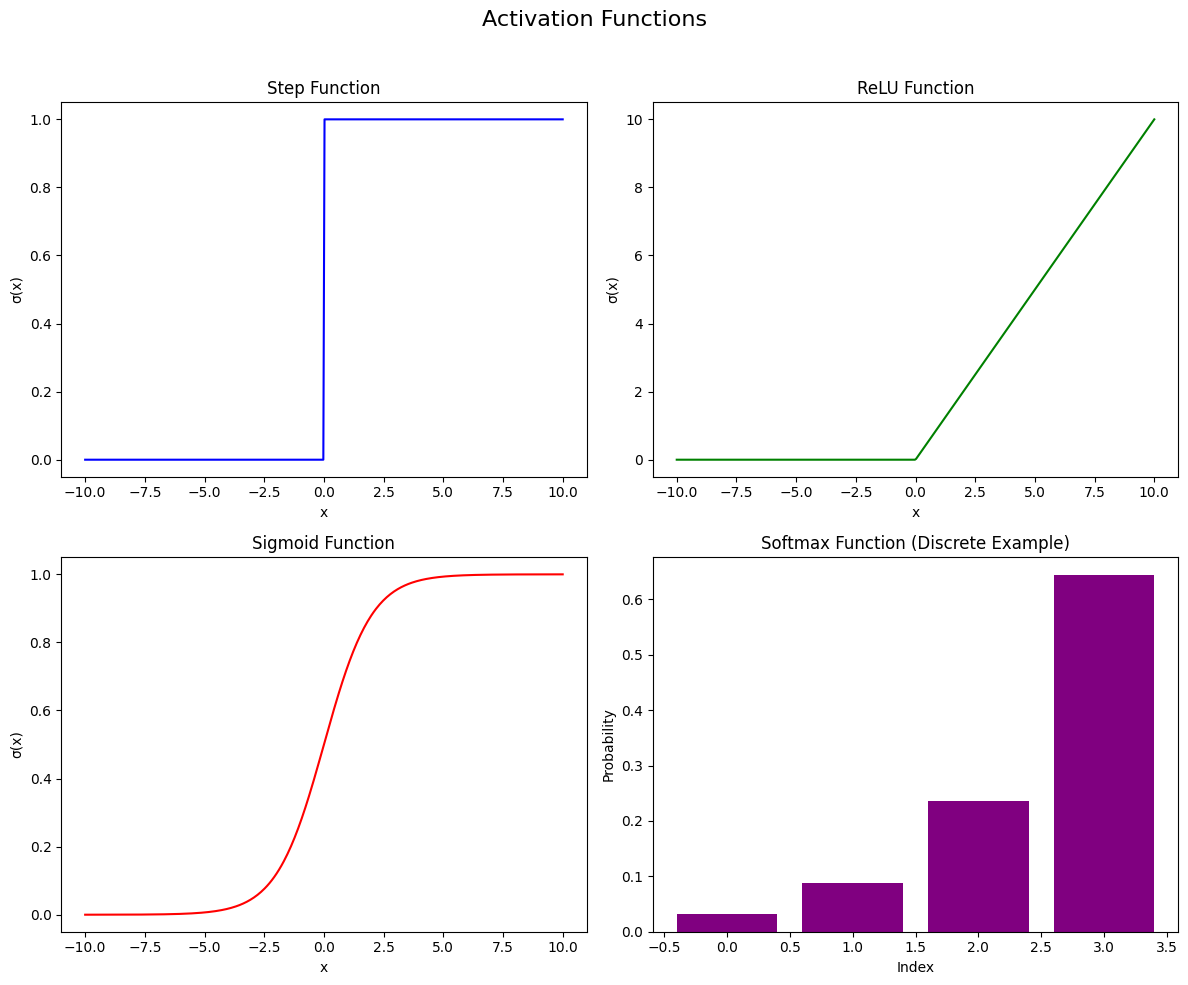

Activation Function Outputs:

Softmax Input Vector: [1. 2. 3. 4.]
Softmax Output (Probabilities): [0.0320586  0.08714432 0.23688282 0.64391426]


In [5]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define each activation function

# 3.7.2.1 Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# 3.7.2.2 ReLU Function
def relu(x):
    return np.maximum(0, x)

# 3.7.2.3 Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 3.7.2.4 Softmax Function
def softmax(x):
    exps = np.exp(x - np.max(x))  # Subtracting max for numerical stability
    return exps / np.sum(exps, axis=0)

# Step 2: Plot each function to observe its behavior

# Generate an array of values from -10 to 10 to serve as input
x = np.linspace(-10, 10, 400)

# Calculate outputs for each function
step_output = step_function(x)
relu_output = relu(x)
sigmoid_output = sigmoid(x)

# For Softmax, we typically use an input vector instead of a range of values
x_softmax = np.array([1.0, 2.0, 3.0, 4.0])
softmax_output = softmax(x_softmax)

# Step 3: Plot the functions
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Activation Functions", fontsize=16)

# Step Function Plot
axs[0, 0].plot(x, step_output, color='blue')
axs[0, 0].set_title("Step Function")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("σ(x)")

# ReLU Function Plot
axs[0, 1].plot(x, relu_output, color='green')
axs[0, 1].set_title("ReLU Function")
axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("σ(x)")

# Sigmoid Function Plot
axs[1, 0].plot(x, sigmoid_output, color='red')
axs[1, 0].set_title("Sigmoid Function")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("σ(x)")

# Softmax Function Plot
axs[1, 1].bar(range(len(x_softmax)), softmax_output, color='purple')
axs[1, 1].set_title("Softmax Function (Discrete Example)")
axs[1, 1].set_xlabel("Index")
axs[1, 1].set_ylabel("Probability")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Explanation for each activation function
print("Activation Function Outputs:\n")
print(f"Softmax Input Vector: {x_softmax}")
print(f"Softmax Output (Probabilities): {softmax_output}")

***Explanation of Each Activation Function***

1. **Step Function**:
   - Formula: $\sigma(x) = \begin{cases} 0, & x < 0 \\ 1, & x \geq 0 \end{cases}$
   - Explanation: Useful in binary classification scenarios as it returns either 0 or 1. It is a non-differentiable function and thus rarely used in deep learning applications where gradients are needed.

2. **ReLU Function**:
   - Formula: $\sigma(x) = \max(0, x)$
   - Explanation: This activation allows only positive values to pass through, making it effective in deep neural networks for faster convergence due to sparsity. It is widely used due to its simplicity and effectiveness in gradient-based optimizations.

3. **Sigmoid Function**:
   - Formula: $\sigma(x) = \frac{1}{1 + e^{-x}}$
   - Explanation: This function squashes input values to a range between 0 and 1, making it suitable for probability-based outputs. However, it can lead to vanishing gradients when values approach the limits of 0 and 1.

4. **Softmax Function**:
   - Formula: $\sigma(x_i) = \frac{e^{x_i}}{\sum_{j=1}^K e^{x_j}}$
   - Explanation: Often used in the output layer for multi-class classification problems, this function transforms the input vector into a probability distribution over the classes.

Each plot provides a visualization of how the functions handle positive and negative values and their impact on neural network layers. The code demonstrates each function’s effect on a range of input values, highlighting why each activation is chosen for specific types of neural network tasks.

# **Section 3.7.3. Cost function**

1. **Mean Squared Error (MSE)** – Suitable for regression tasks.
2. **Binary Cross-Entropy Loss** – Commonly used for binary classification tasks.

For each cost function, we'll define it mathematically, create the corresponding Python function, and apply it to sample data for a practical example.

Mean Squared Error (MSE) Cost: 0.1875
Binary Cross-Entropy Cost: 0.2656183105130591


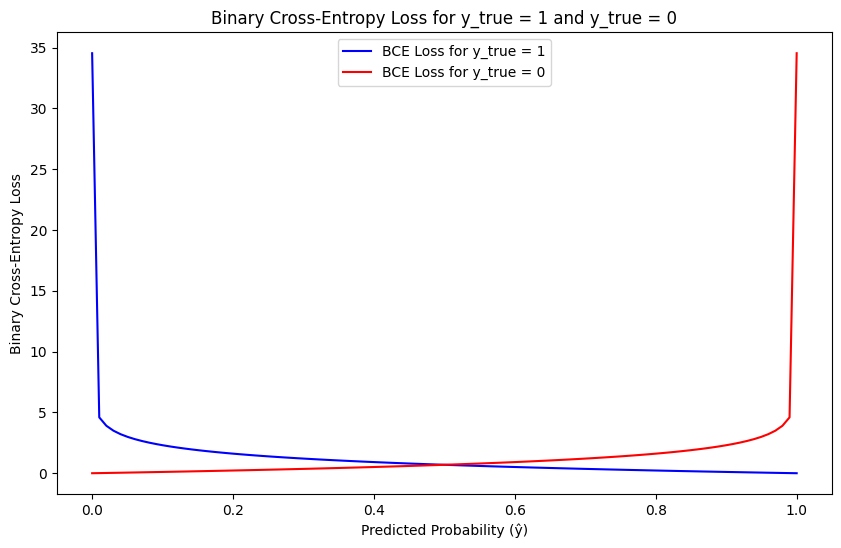

In [9]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the Mean Squared Error (MSE) cost function for regression
def mean_squared_error(y_true, y_pred):
    """
    Computes the Mean Squared Error (MSE) between actual and predicted values.
    Args:
    y_true -- numpy array of true values
    y_pred -- numpy array of predicted values
    Returns:
    MSE cost
    """
    return 0.5 * np.mean((y_pred - y_true) ** 2)

# Example Data for Regression
y_true_reg = np.array([3, -0.5, 2, 7])  # True values
y_pred_reg = np.array([2.5, 0.0, 2, 8])  # Predicted values

# Calculate MSE Cost
mse_cost = mean_squared_error(y_true_reg, y_pred_reg)
print("Mean Squared Error (MSE) Cost:", mse_cost)

# 2. Define Binary Cross-Entropy Loss for binary classification
def binary_cross_entropy(y_true, y_pred):
    """
    Computes the Binary Cross-Entropy loss between actual and predicted values.
    Args:
    y_true -- numpy array of true binary values (0 or 1)
    y_pred -- numpy array of predicted probabilities (between 0 and 1)
    Returns:
    Binary Cross-Entropy cost
    """
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Avoid log(0) by clipping
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Example Data for Binary Classification
y_true_class = np.array([1, 0, 1, 1])  # True values (0 or 1)
y_pred_class = np.array([0.9, 0.2, 0.8, 0.6])  # Predicted probabilities

# Calculate Binary Cross-Entropy Cost
bce_cost = binary_cross_entropy(y_true_class, y_pred_class)
print("Binary Cross-Entropy Cost:", bce_cost)

# Step 3: Visualize the Cost Functions
# Plotting Binary Cross-Entropy loss for different prediction scenarios

# Define range of prediction values for demonstration
epsilon = 1e-15  # Small value to avoid log(0)
y_pred_values = np.linspace(0 + epsilon, 1 - epsilon, 100)

# Calculate Binary Cross-Entropy for fixed true value of 1 and 0
bce_loss_values_1 = [-np.log(y_pred) for y_pred in y_pred_values]
bce_loss_values_0 = [-np.log(1 - y_pred) for y_pred in y_pred_values]

# Plot Binary Cross-Entropy loss for y_true = 1 and y_true = 0
plt.figure(figsize=(10, 6))
plt.plot(y_pred_values, bce_loss_values_1, label="BCE Loss for y_true = 1", color='blue')
plt.plot(y_pred_values, bce_loss_values_0, label="BCE Loss for y_true = 0", color='red')
plt.xlabel("Predicted Probability (ŷ)")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Binary Cross-Entropy Loss for y_true = 1 and y_true = 0")
plt.legend()
plt.show()

***Explanation of Each Cost Function***

1. **Mean Squared Error (MSE)**:
   - Formula: $J = \frac{1}{2N} \sum_{n=1}^{N} \sum_{k=1}^{K} \left( y^{(n)}_k - \hat{y}^{(n)}_k \right)^2$
   - Explanation: This function computes the average of squared differences between predicted values and true values. MSE penalizes larger errors more heavily, making it suitable for regression tasks.

2. **Binary Cross-Entropy Loss**:
   - Formula: $J = -\sum_{n=1}^{N} \left[ y^{(n)} \ln \hat{y}^{(n)} + (1 - y^{(n)}) \ln (1 - \hat{y}^{(n)}) \right]$
   - Explanation: Binary Cross-Entropy Loss measures the difference between the actual and predicted probabilities, penalizing incorrect predictions more strongly when probabilities are close to 0 or 1. This cost function is commonly used in binary classification.

Each cost function example is calculated using simple arrays of true and predicted values, and the output is visualized for the Binary Cross-Entropy function to demonstrate how it changes with different predicted probabilities.

# **Section 3.7.4. Backpropagation**

To demonstrate backpropagation, we will implement a small neural network in Python and calculate the gradients of the cost function with respect to the weights and biases using backpropagation. In this example, we’ll use the Mean Squared Error (MSE) as the cost function and Sigmoid as the activation function. Here is an outline of the example we'll cover:

1. **Forward Pass**: Calculate the activations for each layer.
2. **Backward Pass**: Compute the gradients for weights and biases using backpropagation.
3. **Update Parameters**: Show how the gradients are used to update weights and biases to minimize the cost function.

Here is the Python code:

In [1]:
import numpy as np

# Sigmoid Activation Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of Sigmoid
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Mean Squared Error Cost Function
def mean_squared_error(y_true, y_pred):
    return 0.5 * np.mean((y_pred - y_true) ** 2)

# Forward Propagation Function
def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

# Backward Propagation Function
def backward_propagation(X, y_true, parameters, cache):
    m = X.shape[1]  # number of examples

    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    A1, A2 = cache["A1"], cache["A2"]

    # Gradient of the cost with respect to A2
    dA2 = A2 - y_true

    # Backpropagation for output layer (layer 2)
    dZ2 = dA2 * sigmoid_derivative(cache["Z2"])
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    # Backpropagation for hidden layer (layer 1)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(cache["Z1"])
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients

# Parameters Initialization
np.random.seed(1)
parameters = {
    "W1": np.random.randn(2, 2) * 0.01,
    "b1": np.zeros((2, 1)),
    "W2": np.random.randn(1, 2) * 0.01,
    "b2": np.zeros((1, 1)),
}

# Input and output data
X = np.array([[0.05], [0.1]])  # Input data (2 features, 1 sample)
y_true = np.array([[1]])       # Target output

# Learning Rate
learning_rate = 0.1

# Training
for i in range(1000):
    # Forward Propagation
    y_pred, cache = forward_propagation(X, parameters)

    # Compute Cost
    cost = mean_squared_error(y_true, y_pred)

    # Backward Propagation
    gradients = backward_propagation(X, y_true, parameters, cache)

    # Update Parameters
    parameters["W1"] -= learning_rate * gradients["dW1"]
    parameters["b1"] -= learning_rate * gradients["db1"]
    parameters["W2"] -= learning_rate * gradients["dW2"]
    parameters["b2"] -= learning_rate * gradients["db2"]

    # Print cost every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Cost: {cost}")

# Final prediction after training
print("Final prediction after training:", y_pred)

Iteration 0, Cost: 0.12589816986997068
Iteration 100, Cost: 0.02877249746205622
Iteration 200, Cost: 0.013298313679564132
Iteration 300, Cost: 0.008207174777334207
Iteration 400, Cost: 0.005808923669899432
Iteration 500, Cost: 0.004445288404361902
Iteration 600, Cost: 0.0035760879856556503
Iteration 700, Cost: 0.0029780645760324534
Iteration 800, Cost: 0.0025435458271480305
Iteration 900, Cost: 0.0022146636468376177
Final prediction after training: [[0.93738999]]


***Explanation:***

1. **Initialization**: We initialize weights (`W1`, `W2`) and biases (`b1`, `b2`) with small random values and zeros, respectively.
2. **Forward Propagation**:
   - We calculate `Z1` and `A1` for the first layer and `Z2` and `A2` for the output layer using the sigmoid activation.
3. **Backward Propagation**:
   - We compute the gradients of the cost function with respect to each weight and bias using the chain rule.
   - The gradients `dW1`, `db1`, `dW2`, and `db2` are obtained using the derivative of the sigmoid and MSE cost function.
4. **Update Parameters**: Using the gradients, we update the weights and biases to minimize the cost function.

***Output:***

The code will print the cost at every 100 iterations to demonstrate the convergence of the model and finally display the prediction after training. Each iteration represents a step in minimizing the error through backpropagation, effectively training the neural network.

# **Section 3.7.5. Backpropagation algorithm**

To demonstrate the backpropagation algorithm as described, we will create a simple neural network that uses stochastic gradient descent (SGD) to update its weights and biases. We’ll illustrate the complete process with explanations on initializing weights and biases, forward and backward propagation, calculating gradients, and updating weights and biases iteratively until convergence.

Here’s a Python implementation with explanatory comments:

In [2]:
import numpy as np

# Sigmoid Activation Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of Sigmoid
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Quadratic Cost Function (Mean Squared Error)
def quadratic_cost(y_true, y_pred):
    return 0.5 * np.mean((y_pred - y_true) ** 2)

# Forward Propagation Function
def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

# Backward Propagation Function
def backward_propagation(X, y_true, parameters, cache):
    m = X.shape[1]  # number of examples

    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    A1, A2 = cache["A1"], cache["A2"]

    # Output layer error term (delta for last layer)
    delta_L = (A2 - y_true) * sigmoid_derivative(cache["Z2"])

    # Gradients for weights and biases of the output layer
    dW2 = (1 / m) * np.dot(delta_L, A1.T)
    db2 = (1 / m) * np.sum(delta_L, axis=1, keepdims=True)

    # Hidden layer error term
    delta_1 = np.dot(W2.T, delta_L) * sigmoid_derivative(cache["Z1"])

    # Gradients for weights and biases of the hidden layer
    dW1 = (1 / m) * np.dot(delta_1, X.T)
    db1 = (1 / m) * np.sum(delta_1, axis=1, keepdims=True)

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients

# Parameters Initialization
np.random.seed(1)
parameters = {
    "W1": np.random.randn(2, 2) * 0.01,
    "b1": np.zeros((2, 1)),
    "W2": np.random.randn(1, 2) * 0.01,
    "b2": np.zeros((1, 1)),
}

# Input and output data
X = np.array([[0.05], [0.1]])  # Input data (2 features, 1 sample)
y_true = np.array([[1]])       # Target output

# Learning Rate
learning_rate = 0.1

# Training Loop
for i in range(1000):
    # Forward Propagation
    y_pred, cache = forward_propagation(X, parameters)

    # Compute Cost
    cost = quadratic_cost(y_true, y_pred)

    # Backward Propagation
    gradients = backward_propagation(X, y_true, parameters, cache)

    # Update Parameters (Stochastic Gradient Descent Step)
    parameters["W1"] -= learning_rate * gradients["dW1"]
    parameters["b1"] -= learning_rate * gradients["db1"]
    parameters["W2"] -= learning_rate * gradients["dW2"]
    parameters["b2"] -= learning_rate * gradients["db2"]

    # Print cost every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Cost: {cost}")

# Final prediction after training
print("Final prediction after training:", y_pred)

Iteration 0, Cost: 0.12589816986997068
Iteration 100, Cost: 0.02877249746205622
Iteration 200, Cost: 0.013298313679564132
Iteration 300, Cost: 0.008207174777334207
Iteration 400, Cost: 0.005808923669899432
Iteration 500, Cost: 0.004445288404361902
Iteration 600, Cost: 0.0035760879856556503
Iteration 700, Cost: 0.0029780645760324534
Iteration 800, Cost: 0.0025435458271480305
Iteration 900, Cost: 0.0022146636468376177
Final prediction after training: [[0.93738999]]


***Explanation of Code:***

1. **Initialization**:
   - Weights and biases are initialized with small random values to avoid symmetry in the network during learning.
   
2. **Forward Propagation**:
   - The function calculates the activations in the hidden and output layers using the sigmoid function.
   
3. **Cost Function**:
   - We use the quadratic cost function here to calculate the error between predictions and the target output.

4. **Backward Propagation**:
   - We calculate the error term $\delta$ for the output layer as a function of the difference between predicted and true values, multiplied by the derivative of the sigmoid function.
   - This $\delta$ value is then propagated backward to the hidden layer, allowing us to calculate the gradients for the hidden weights and biases.
   
5. **Gradient Descent Step**:
   - We update weights and biases using the gradients and a learning rate, allowing the network to minimize the cost function iteratively.
   
6. **Training Loop**:
   - The network trains by repeating forward and backward propagation until convergence. The cost is printed every 100 iterations for progress tracking.

***Expected Output:***

The final output shows the prediction after training, reflecting how close the network's predictions are to the target after applying backpropagation over multiple iterations. The training loop minimizes the cost function, demonstrating convergence as the cost decreases.

This example illustrates how backpropagation works by computing gradients layer by layer and adjusting weights and biases accordingly.